# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [121]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')
from nltk.corpus import names

stopwords = stopwords.words('english')

## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [122]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
df = pd.read_csv('data/20-newsgroups.csv')
# 2. Print the shape
print(f"Shape: {df.shape}")

df.head()

Shape: (11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [123]:
# 3. Inspect / remove nulls and duplicates
df.isnull().sum()

id                0
message           0
topic             0
topic_category    0
dtype: int64

In [124]:
df.duplicated().sum()

0

In [125]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts(normalize=True)*100

rec.sport.hockey            5.303164
soc.religion.christian      5.294326
rec.motorcycles             5.285487
rec.sport.baseball          5.276648
sci.crypt                   5.258971
rec.autos                   5.250133
sci.med                     5.250133
comp.windows.x              5.241294
sci.space                   5.241294
comp.os.ms-windows.misc     5.223617
sci.electronics             5.223617
comp.sys.ibm.pc.hardware    5.214778
misc.forsale                5.170585
comp.graphics               5.161747
comp.sys.mac.hardware       5.108715
talk.politics.mideast       4.984974
talk.politics.guns          4.825879
alt.atheism                 4.242531
talk.politics.misc          4.109952
talk.religion.misc          3.332155
Name: topic_category, dtype: float64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [126]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
def make_lower(input):
    return input.lower()

print(make_lower(test_string))

this is a sentence with lots of caps.


In [127]:
# 2. Make a function that removes all punctuation. 

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def remove_punc(input):
    only_alpha = re.sub(r"[^\w\s]", repl='', string=input) #replacing the punc with ""
    return only_alpha
    
print(remove_punc(test_string))

This is a sentence 50 With lots of punctuation  other things


In [128]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def remove_sw_1(input):
    without_sw = [word for word in input.split() if word not in stopwords] #Can be useful but doesn't take \n, \t in account.
    return ' '.join(without_sw)
    
print(remove_sw_1(test_string))

This sentence! With different stopwords added here.


In [129]:
# Version-2 
test_string = 'i played and started dd playing Sharon with players and we all love to play with plays'

def remove_sw(input):
    input = word_tokenize(input)
    all_names = names.words()
    without_sw = [word for word in input 
                  if word not in stopwords]
    return ' '.join(without_sw)

print(remove_sw(test_string))

played started dd playing Sharon players love play plays


In [130]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def get_stem(input):
    stemming = PorterStemmer()
    tokenized_words = word_tokenize(input)
    
    stemmed_words = [stemming.stem(word) for word in tokenized_words]
    return ' '.join(stemmed_words)

print(get_stem(test_string))

i play and start play with player and we all love to play with play


In [131]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

test_string = 'I played and started! dd playing! @ with players and we~ all love to play with plays'
def pipeline(input_str):
    input_str = make_lower(input_str)
    input_str = remove_punc(input_str)
    input_str = remove_sw(input_str)
    input_str = get_stem(input_str)

    return input_str

print(pipeline(test_string))

play start dd play player love play play


In [132]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
pre_clean = df['message']

df['cleaned_message'] = df['message'].apply(pipeline)

In [133]:
print("Pre-cleaned- Row 6: ", pre_clean[6])
print("Post-cleaned- Row 6: ", df['cleaned_message'][6])

Pre-cleaned- Row 6:  From: bmdelane@quads.uchicago.edu (brian manning delaney)
Subject: Brain Tumor Treatment (thanks)
Reply-To: bmdelane@midway.uchicago.edu
Organization: University of Chicago
Lines: 12

There were a few people who responded to my request for info on
treatment for astrocytomas through email, whom I couldn't thank
directly because of mail-bouncing probs (Sean, Debra, and Sharon).  So
I thought I'd publicly thank everyone.

Thanks! 

(I'm sure glad I accidentally hit "rn" instead of "rm" when I was
trying to delete a file last September. "Hmmm... 'News?' What's
this?"....)

-Brian

Post-cleaned- Row 6:  bmdelanequadsuchicagoedu brian man delaney subject brain tumor treatment thank replyto bmdelanemidwayuchicagoedu organ univers chicago line 12 peopl respond request info treatment astrocytoma email couldnt thank directli mailbounc prob sean debra sharon thought id publicli thank everyon thank im sure glad accident hit rn instead rm tri delet file last septemb hmmm news w

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [134]:
df.head()

,id,message,topic,topic_category,cleaned_message
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu where thing subject car nntppo...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thoma e willi subject pb...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamb joe green subject weitek p9000 organ...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowel subject ...


In [135]:
# 1. Define your `X` and `y` data. 
X = df['cleaned_message'].values
y = df['topic_category'].values

In [136]:
y

array(['rec.autos', 'comp.sys.mac.hardware', 'comp.sys.mac.hardware', ...,
       'comp.sys.ibm.pc.hardware', 'comp.graphics', 'rec.motorcycles'],
      dtype=object)

In [137]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
count_vector = TfidfVectorizer()

In [138]:
# 3. Fit your vectorizer using your X data
count_vector.fit(X)

TfidfVectorizer()

In [139]:
# 4. Transform your X data using your fitted vectorizer. 
X = count_vector.transform(X)

In [140]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?
X.shape

(11314, 119708)

In [141]:
features = count_vector.get_feature_names_out()
weights = count_vector.idf_

print(len(features), len(weights))

df_idf = pd.DataFrame.from_dict({'feature': features, 'idf': weights})
df_idf = df_idf.sort_values(by='idf', ascending=False)  #Sorting by item frequency

df_idf.head()

119708 119708


,feature,idf
59854,konstantinopoli,9.640737
70532,maxutu72pl707u7vznlznkjznki8f727b9nevz,9.640737
70529,maxson,9.640737
70528,maxslinkynyuedu,9.640737
70527,maxslinkycsnyuedu,9.640737


# Split your data into Training and Testing data. 

In [142]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [143]:
X_train.shape

(7580, 119708)

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [144]:
# 1. Initalize an empty model. 
model = MultinomialNB(alpha=0.05)

In [145]:
# Fit our model with our training data.
model.fit(X_train, y_train)


MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [146]:
# 1. Make new predictions of our testing data. 
y_pred = model.predict(X_test)

# Pred Probability
y_pred_proba = model.predict_proba(X_test)

In [147]:
# 2. Print the accuracy of the model. 

accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f " % accuracy)

Model Accuracy: 0.905196 


C:\Users\dip2l\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


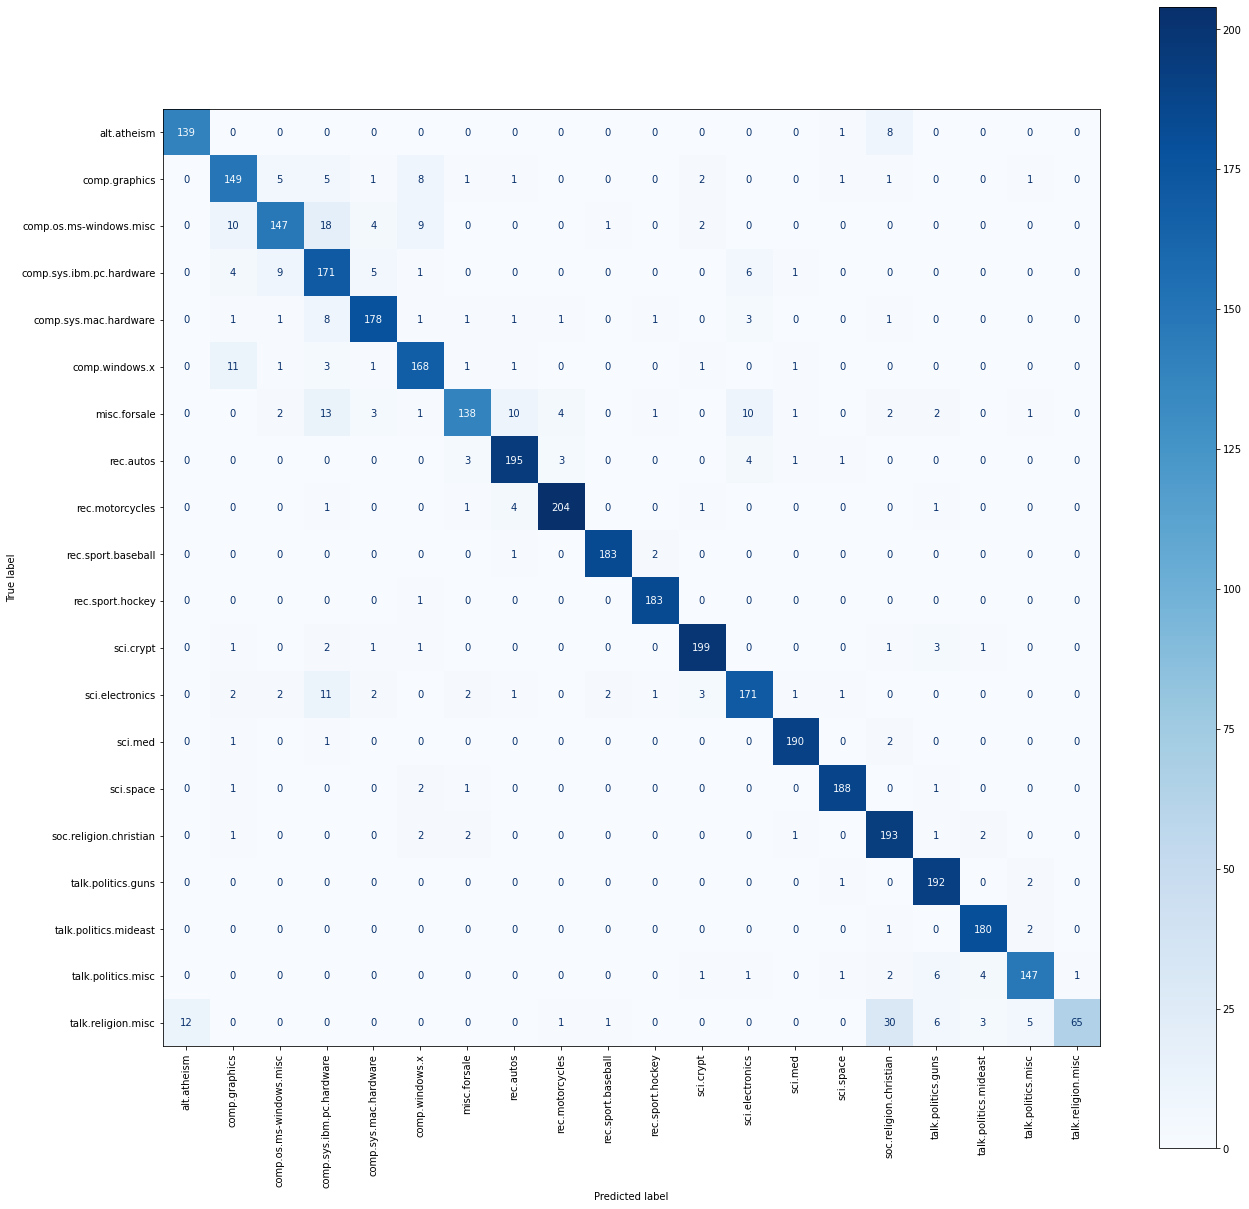

In [148]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(model, X_test, y_test,
                             display_labels=model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [151]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.92      0.94      0.93       148
           comp.graphics       0.82      0.85      0.84       175
 comp.os.ms-windows.misc       0.88      0.77      0.82       191
comp.sys.ibm.pc.hardware       0.73      0.87      0.80       197
   comp.sys.mac.hardware       0.91      0.90      0.91       197
          comp.windows.x       0.87      0.89      0.88       188
            misc.forsale       0.92      0.73      0.82       188
               rec.autos       0.91      0.94      0.93       207
         rec.motorcycles       0.96      0.96      0.96       212
      rec.sport.baseball       0.98      0.98      0.98       186
        rec.sport.hockey       0.97      0.99      0.98       184
               sci.crypt       0.95      0.95      0.95       209
         sci.electronics       0.88      0.86      0.87       199
                 sci.med       0.97      0.98      0.97       194
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [150]:
my_sentence = ???

# 1. Apply the text pipeline to your sentence

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\

# 3. Use the model to predict your new `X`. 

# 4. Print the prediction


SyntaxError: invalid syntax (4159467672.py, line 1)

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [152]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [158]:
print(df['Party'][55],"::", df['Tweet'][3])

Democrat :: RT @NALCABPolicy: Meeting with @RepDarrenSoto . Thanks for taking the time to meet with @LatinoLeader ED Marucci Guzman. #NALCABPolicy2018.…


In [160]:
df.shape

(86460, 3)